In [1]:
import os
import polars as pl
import polars.selectors as cs

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Check the correlations of the "all_features" model features

path = "../data/Excel/preprocessed_data/supernormals_amyloid_neg_csf/cognitive_features_all.csv"
df = pl.read_csv(path, has_header=True)
renaming = {col: col.lower() for col in df.columns}
df = df.rename(renaming)
to_drop = ["tam_frercl_pga1", "neoformstest15obj_pga1", "tam_ttlscr_pga1", "tam_total_pga1",
           "jlototal_pga1", "bskdly_ttlrsc_pga1", "rocf_copy_pga1", "zoobads_total_pga1",
           "digit_forw_span_pga1", "stroop_interf_pga1", "letternumber_total_pga1",
           "digit_forw_total_pga1", "tam_cuercl_pga1", "", "age"]
df = df.drop(to_drop)
print(df.head(3))
print(df.shape)

shape: (3, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ vocabular ┆ mmse_tota ┆ tam_inmrc ┆ tam_oritm ┆ … ┆ svf_anim_ ┆ pvf_p_pga ┆ bostonnam ┆ t15objv1 │
│ y         ┆ l_pga1    ┆ l_pga1    ┆ e_pga1    ┆   ┆ pga1      ┆ 1         ┆ ing_pga1  ┆ _pga1    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ f64       ┆ i64       ┆ f64       ┆ f64       ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 41.0      ┆ 28        ┆ 10.0      ┆ 5.0       ┆ … ┆ 15        ┆ 9         ┆ 53        ┆ 14       │
│ 58.0      ┆ 30        ┆ 9.0       ┆ 4.0       ┆ … ┆ 25        ┆ 18        ┆ 60        ┆ 15       │
│ 53.0      ┆ 29        ┆ 10.0      ┆ 5.0       ┆ … ┆ 28        ┆ 20        ┆ 59        ┆ 15       │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────

In [3]:
# # Make a features correlation matrix
# import seaborn as sns
# corr_matrix = df.select(cs.all()).to_pandas().corr(method='pearson')

# plt.figure(figsize=(20, 20))
# plt.title("Correlation matrix of features passing Bonferroni correction", fontsize=16)
# sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
# plt.savefig("./features_passing_bonferroni_correlation_matrix.png", dpi=300)

In [4]:
wd = os.path.dirname(os.getcwd())

In [5]:
ageml_path = os.path.join(wd, "analyses/",
                  "apoe_amyloid_neg_csf/total_features/ageml")
assert os.path.exists(ageml_path)

### Load the data (predicted ages, features_with_sub_id, diagnosis)

In [6]:
ages_path = os.path.join(ageml_path, "model_age/predicted_age.csv")
df_ages = pl.read_csv(ages_path,
                      has_header=True).rename({"": "index"}).cast({"index": pl.Int16})
df_ages.head(3)

index,age,predicted_age_all,corrected_age_all,delta_all
i16,i64,f64,f64,f64
0,57,61.887322,62.936838,5.936838
1,54,57.290577,56.214322,2.214322
2,54,51.705628,50.728421,-3.271579


In [7]:
diagnosis_name = "FIS2021_PGA1_DXSyndr_CSFAD_Vascular_IÑIGO_15.09.2025.xlsx"
diagnosis_path = os.path.join(wd, "data/Excel/", diagnosis_name)
df_diagnosis = pl.read_excel(diagnosis_path)
df_diagnosis = df_diagnosis.select(
    pl.all().map_elements(lambda x: None if x == 9999 or x =="9999" else x)
)
df_diagnosis = df_diagnosis.select(
    pl.all().map_elements(lambda x: None if x == 8888 or x =="8888" else x)
)
df_diagnosis.head(3)

cmp_code,Project,LCR,RM_OK,EXCLU_MCI,BirthDate,Age,Sex,Educ_years,DX_SYNDR_COGIMP_PGA1,EXCL_PATHOL_LCR,EXCL_PATOL_VASC,RM_ARWMC_FAZEKAS,MICROBLEEDS,NÚMEROdemicrosangrados_PGA2,CSF_AB42_Cutoff_SantPau,CSF_PTAU_Cutoff_SantPau,CSF_TTAU_Cutoff_SantPau,P1_SIGCSF_AB42X_lab106,P1_SIGCSF_TAUXXX_lab106,P1_SIGCSF_PTAUXX_lab106
str,i64,i64,i64,i64,date,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,f64,f64,f64
"""000015""",1,0,null,1,1968-08-12,43,1,18,1,null,0,0,0,null,null,null,null,null,null,null
"""000032""",1,0,1,1,1960-01-13,51,0,17,1,null,0,1,0,null,null,null,null,null,null,null
"""000037""",1,1,1,1,1935-08-14,75,0,10,1,1,1,2,0,null,1,0,0,553.0,219.0,48.5


In [8]:
features_path = os.path.join(wd, "data/Excel/preprocessed_data/",
                             "supernormals_amyloid_neg_csf/",
                             "cognitive_features_totals_with_sub_id.csv")
df_features_with_sub_id = pl.read_csv(features_path, infer_schema=False)  # Otherwise cmp_code is read as Int64
df_mapping = df_features_with_sub_id.select(["", "cmp_code"]).rename({"": "index"})
df_mapping = df_mapping.cast({"index": pl.Int16})
df_mapping.head(3)

index,cmp_code
i16,str
0,"""000003"""
1,"""000009"""
2,"""000013"""


### Join the df_ages with the df_mapping to get the cmp_code

In [35]:
df_ages_with_cmp = df_ages.join(df_mapping, on="index", how="inner")
df_ages_with_cmp.head(3)

index,age,predicted_age_all,corrected_age_all,delta_all,cmp_code
i16,i64,f64,f64,f64,str
0,57,61.887322,62.936838,5.936838,"""000003"""
1,54,57.290577,56.214322,2.214322,"""000009"""
2,54,51.705628,50.728421,-3.271579,"""000013"""


### Then join the result with the diagnosis

In [39]:
df_ages_all = df_ages_with_cmp.join(df_diagnosis, on="cmp_code", how="inner")
print(df_ages_all.shape)
print(df_ages_all.columns)

(187, 26)
['index', 'age', 'predicted_age_all', 'corrected_age_all', 'delta_all', 'cmp_code', 'Project', 'LCR', 'RM_OK', 'EXCLU_MCI', 'BirthDate', 'Age', 'Sex', 'Educ_years', 'DX_SYNDR_COGIMP_PGA1', 'EXCL_PATHOL_LCR', 'EXCL_PATOL_VASC', 'RM_ARWMC_FAZEKAS', 'MICROBLEEDS', 'NÚMEROdemicrosangrados_PGA2', 'CSF_AB42_Cutoff_SantPau', 'CSF_PTAU_Cutoff_SantPau', 'CSF_TTAU_Cutoff_SantPau', 'P1_SIGCSF_AB42X_lab106', 'P1_SIGCSF_TAUXXX_lab106', 'P1_SIGCSF_PTAUXX_lab106']


# Now we can begin analyses
### Because now we have the deltas paired to their diagnosis, so we don't need a clinical file anymore for automatic boxplotting.

In [41]:
deltas_cu_amyloid_neg_vascular_neg = df_ages_all.filter(
    (pl.col("DX_SYNDR_COGIMP_PGA1") == 0) & # Being cognitively unimpaired
    (pl.col("LCR") == 1) & # Having CSF data
    (pl.col("EXCL_PATHOL_LCR") == 0) & # No amyloid pathology
    (pl.col("EXCL_PATOL_VASC") == 0) # No vascular pathology
)

deltas_cu_amyloid_neg_vascular_pos = df_ages_all.filter(
    (pl.col("DX_SYNDR_COGIMP_PGA1") == 0) & # Being cognitively unimpaired
    (pl.col("LCR") == 1) & # Having CSF data
    (pl.col("EXCL_PATHOL_LCR") == 0) & # No amyloid pathology
    (pl.col("EXCL_PATOL_VASC") == 1) # Vascular pathology
)

deltas_cu_amyloid_pos_vascular_neg = df_ages_all.filter(
    (pl.col("DX_SYNDR_COGIMP_PGA1") == 0) & # Being cognitively unimpaired
    (pl.col("LCR") == 1) & # Having CSF data
    (pl.col("EXCL_PATHOL_LCR") == 1) & # Amyloid pathology
    (pl.col("EXCL_PATOL_VASC") == 0) # No vascular pathology
)

deltas_cu_amyloid_pos_vascular_pos = df_ages_all.filter(
    (pl.col("DX_SYNDR_COGIMP_PGA1") == 0) & # Being cognitively unimpaired
    (pl.col("LCR") == 1) & # Having CSF data
    (pl.col("EXCL_PATHOL_LCR") == 1) & # Amyloid pathology
    (pl.col("EXCL_PATOL_VASC") == 1) # Vascular pathology
)

print("Number of deltas in each group:")
print("CU, amyloid-, vascular-:", deltas_cu_amyloid_neg_vascular_neg.shape[0])
print("CU, amyloid-, vascular+:", deltas_cu_amyloid_neg_vascular_pos.shape[0])
print("CU, amyloid+, vascular-:", deltas_cu_amyloid_pos_vascular_neg.shape[0])
print("CU, amyloid+, vascular+:", deltas_cu_amyloid_pos_vascular_pos.shape[0])

Number of deltas in each group:
CU, amyloid-, vascular-: 132
CU, amyloid-, vascular+: 0
CU, amyloid+, vascular-: 23
CU, amyloid+, vascular+: 0


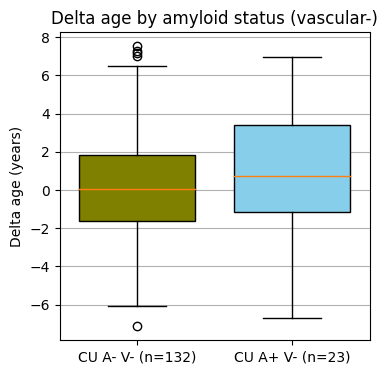

In [57]:
# Boxplot comparing CU amyloid - vascular - and CU amyloid + vascular -
colors = ["olive", "skyblue"]
labels = [f"CU A- V- (n={len(deltas_cu_amyloid_neg_vascular_neg)})",
          f"CU A+ V- (n={len(deltas_cu_amyloid_pos_vascular_neg)})"]
data_to_plot =[
    deltas_cu_amyloid_neg_vascular_neg.select(pl.col("delta_all")).to_series().drop_nulls().to_list(),
    deltas_cu_amyloid_pos_vascular_neg.select(pl.col("delta_all")).to_series().drop_nulls().to_list()
]
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_ylabel("Delta age (years)")
ax.set_title("Delta age by amyloid status (vascular-)")
ax.grid(axis='y')

bplot = ax.boxplot(data_to_plot, labels=labels,
                   widths=0.75, patch_artist=True)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.show()